In [4]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() # アヤメのデータの読み込み
data = iris.data.astype(np.float32)
X = data 
Y = iris.target

index = np.arange(Y.size)
X_train = X[index[index % 2 != 0], :] # 説明変数（教師データ）
X_test = X[index[index % 2 == 0], :] # 説明変数（テストデータ）

import torch
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()

from torch.utils.data import TensorDataset
train = TensorDataset(X_train, X_train)

from torch.utils.data import DataLoader
train_loader = DataLoader(train, batch_size=10, shuffle=True)

In [5]:
class MLPR(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(MLPR, self).__init__()
        self.l1 = torch.nn.Linear(n_input, n_hidden)
        self.l2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        h1 = self.l1(x)
        h2 = torch.sigmoid(h1)
        h3 = self.l2(h2)
        return h3

    def project(self, x):
        h1 = self.l1(x)
        h2 = torch.sigmoid(h1)
        return h2

In [6]:
model = MLPR(4, 2, 4)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

from torch.autograd import Variable
loss_history = []
for epoch in range(500):
    total_loss = 0
    for x_train, y_train in train_loader:
        x_train = Variable(x_train)
        y_train = Variable(y_train)
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_history.append(total_loss)
    if (epoch +1) % 50 == 0:
        print(epoch + 1, total_loss)

50 6.317822217941284
100 3.994909793138504
150 2.713336765766144
200 2.054010346531868
250 1.6589311733841896
300 1.3480709046125412
350 1.1511779427528381
400 0.9947337508201599
450 0.9792218580842018
500 0.8882438614964485


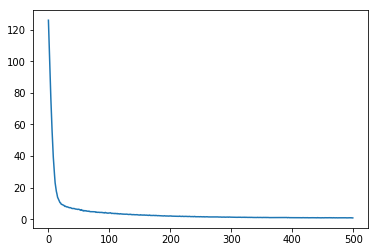

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [8]:
latent = model.project(X_train)

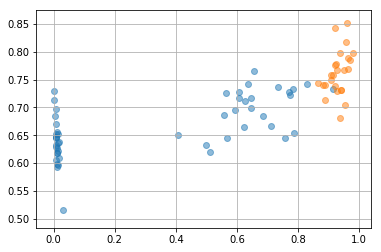

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(latent.data[0:50, 0], latent.data[0:50, 1], alpha=0.5)
plt.scatter(latent.data[50:100, 0], latent.data[50:100, 1], alpha=0.5)
plt.scatter(latent.data[100:150, 0], latent.data[100:150, 1], alpha=0.5)
plt.grid()